#                       Physical Database Model and Social Media

Abstract:

The theme of the assignment is to model, gather, clean the data and store it in a physical database to ask analyze Social Media for a particular domain Crime Movies. Each domain has entities that represent consumers, producers and companies. 

    ->For our first table we are scraping data from IMDb site and going to use it as our base table, it contains the list of all the crime movies, their ratings,release year,votes,etc and passing the data into a dataframe and inserting into a physical database.
    
    ->For the second table, we are using Twitter as our social media and using tweepy we are getting the producer data with the movie names list, we are getting datas such as the posts,retweets,screenname,etc and passing the data into a dataframe and inserting into a physical database.

    ->For the third table, we are using Twitter as our social media and using tweepy we are getting the Company data with the movie directors list, we are getting datas such as the posts,retweets,screenname,etc and passing the data into a dataframe and inserting into a physical database.
    
    ->For the fourth table, we are using Reddit as our social media and using praw we are getting the Consumer data with the movie names list, we are getting datas such as the user name,post id,upvotes,time stamp of when the post was posted,etc and passing the data into a dataframe and inserting into a physical database.

Code:

 1.Scrape data only the latest crime movies from IMDb site and keep it as a base table

In [1]:
# To get data form twitter
import tweepy
# To get data from reddit
import praw
import pandas as pd
# To get timestamp
import time
import twitter
import json

from requests import get
url = "https://www.imdb.com/search/title?genres=crime&explore=title_type,genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f1cf7b98-03fb-4a83-95f3-d833fdba0471&pf_rd_r=F726BWPZFTQDCNJAPDN2&pf_rd_s=center-3&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_pr3_i_3"
response = get(url)

## importing Beautiful Soup
from bs4 import BeautifulSoup as bs 

## python's in built library HTML parser
html_soup = bs(response.text,'html.parser')

id_check = html_soup.find(id ="main")
movie_container = id_check.find_all(class_ ="lister-item mode-advanced")
container = movie_container[3]

movie_names = []
year_release = []
imdb_ratings = []
metascores = []
votes = []
movie_description = []
certificate = []
runtime = []
genre = []
director_name = []
star_cast = []
gross_value = []

for container in movie_container:
    
   
    #if movie has Metascore, then extract:
    if container.find("div", class_ = "ratings-metascore") is not None:
        
        
        #the movie_name
        name = container.h3.a.text
        movie_names.append(name)

In [2]:
movie_names = []
year_release = []
imdb_ratings = []
metascores = []
votes = []
movie_description = []
certificate = []
runtime = []
genre = []
director_name = []
star_cast = []
gross_value = []

for container in movie_container:
    
   
    #if movie has Metascore, then extract:
    
        
        
        #the movie_name
        name = container.h3.a.text
        movie_names.append(name)
        
        release = container.find("span", class_ = "lister-item-year text-muted unbold").text
        year_release.append(release)
        
        if container.strong!=None:
            ratings = float(container.strong.text)
            imdb_ratings.append(ratings)
        else:
            imdb_ratings.append(None)
        
        if container.find("div", class_ = "ratings-metascore")!=None:
            meta = container.find("span", class_ = "metascore").text
            metascores.append(int(meta))
        else:
            metascores.append(None)
        
        
        if  container.find("span", attrs = {"name":"nv"})!=None:
            vote = (container.find("span", attrs = {"name":"nv"}).text)
            vote = vote.split(",")
            votes.append(int("".join(vote)))
        else:
            votes.append(None)
            
            
        if container.find("span", class_ = "certificate")!=None:
            certificate.append(container.find("span", class_ = "certificate").text)
        else:
            certificate.append(None)
        
        #the runtime
        if container.find("span", class_ ="runtime")!= None:
            runtime.append(container.find("span", class_ ="runtime").text)
        else:
            runtime.append(None)
        
        gen = container.find("span", class_ ="genre").text
        genre.append(gen)
        
        #fetching all <p> tags
        content = container.find_all("p")
        
        #the description
        desc = content[1].text
        movie_description.append(desc)
        
        #subsetting all the <a> tags in 3rd <p> tag
        content_2 = content[2].find_all("a")
        
        #the director
        director = content_2[0].text
        director_name.append(director)
        
        if len(container.find_all("span", attrs = {"name":"nv"})) >= 2:
            gross = container.find_all("span", attrs = {"name":"nv"})[1]['data-value']
            gross_value.append(gross)
        else:
            gross_value.append(None)
        #extracting artists names
        temp = []
        for i in range(len(content_2)-1):
            temp.append(content_2[i].text)
        star_cast.append(temp)

In [3]:
test_df = pd.DataFrame({"movie_names":movie_names,
                        "year_release":year_release,
                        "imdb_ratings":imdb_ratings,
                        "metascores":metascores,
                        "votes":votes,
                        "movie_description":movie_description,
                        "certificate":certificate,
                        "runtime":runtime,
                        "genre":genre,
                        "director_name": director_name,
                        "gross_value":gross_value
                       })

In [4]:
#Storing the IMDb movies in a data frame
test_df

,movie_names,year_release,imdb_ratings,metascores,votes,movie_description,certificate,runtime,genre,director_name,gross_value
0,Triple Frontier,(2019),6.6,61.0,37148.0,\n Loyalties are tested when five former sp...,R,125 min,"\nAction, Adventure, Crime",J.C. Chandor,None
1,True Detective,(2014– ),9.0,NaN,431649.0,\n Seasonal anthology series in which polic...,TV-MA,55 min,"\nCrime, Drama, Mystery",Vince Vaughn,None
2,Riverdale,(2016– ),7.4,NaN,82018.0,\n While navigating the troubled waters of ...,TV-14,45 min,"\nCrime, Drama, Mystery",K.J. Apa,None
3,Brooklyn Nine-Nine,(2013– ),8.4,NaN,138914.0,"\n Jake Peralta, an immature, but talented ...",TV-14,22 min,"\nComedy, Crime",Andy Samberg,None
4,Joker,(2019),NaN,NaN,NaN,\n A failed stand-up comedian is driven ins...,None,None,"\nCrime, Drama, Thriller",Todd Phillips,None
5,The Blacklist,(2013– ),8.1,NaN,154129.0,"\n A new FBI profiler, Elizabeth Keen, has ...",TV-14,43 min,"\nCrime, Drama, Mystery",James Spader,None
6,Gotham,(2014–2019),7.9,NaN,190382.0,\n The story behind Detective James Gordon'...,TV-14,42 min,"\nAction, Crime, Drama",Ben McKenzie,None
7,Arrow,(2012– ),7.7,NaN,375092.0,\n Spoiled billionaire playboy Oliver Queen...,TV-14,42 min,"\nAction, Adventure, Crime",Stephen Amell,None
8,Peaky Blinders,(2013– ),8.8,NaN,182450.0,\n A gangster family epic set in 1919 Birmi...,TV-MA,60 min,"\nCrime, Drama",Cillian Murphy,None
9,The Act,(2019– ),8.5,NaN,223.0,"\n Follows Gypsy Blanchard, a girl trying t...",None,60 min,"\nCrime, Drama, Horror",Patricia Arquette,None


In [5]:
test_df.to_csv('movies.csv')

Field Definitions for test_df dataframe:

1.  movie_names: The names of the latest crime movies.
2.  year_release: The year the movies was released.
3.  imdb_ratings: The rating given by users for that particular movie in the imdb site.
4.  metascores: The ratings are the scores from the website Metacritic.com 
5.  votes: The maximum number of votes giveb by the user for that particular movie
6.  movie_description: A line about what the movie is about.
7.  certificate: Certificate either U,A,U/A,R,S,etc by the movie board.
8.  runtime: The total duration of the movie.
9.  genre: The genre to which the movie belongs to.
10. directorname: The director of the movie.
11. grossvalue: The gross value of the movie.

2. Producer data got from Twitter social media using tweepy

In [6]:
auth = tweepy.OAuthHandler('txYQMdaj8r5RxSHIRkwByuAmt', 'd0iTvH7oQ4C77BnIgP8HIhCGRiCovBS3JT2nCcA3FPIg18DTtP')
auth.set_access_token('1098703883562569728-en3SNCMMJqdWw5NraFRNEQ3Ok3ZyfO', 'RNXtn2KQfeps0JuVeU4krAT9Ac2lobbSX7C5qBZb449Yg')

api = tweepy.API(auth)
post=[]
tweet_id=[]
retweeted=[]
screenname=[]
users=["EllenPage","Scorsese4Ever","AndySamberg","jonnybernthal","ben_mckenzie","kj_apa","StephenAmell","ItsRamiMalek","BryanCranston","RealGaryRoss"]
timestamp=[]
name=[]

for username in users:
    
    for status in tweepy.Cursor(api.user_timeline, username).items(10):
        #print(status)
        post.append(status.text)
        tweet_id.append(status.id)
        retweeted.append(status.retweeted)
        timestamp.append(status.created_at)
        screenname.append(status.user.screen_name)
        name.append(status.user.name)
        
dataframeMovie_1 = pd.DataFrame(
    {'post': post,
     'tweet_id': tweet_id,
     'retweeted': retweeted,
     'timestamp': timestamp,
     'screenname':screenname,
     'name':name
    })
dataframeMovie_1

,post,tweet_id,retweeted,timestamp,screenname,name
0,RT @350: WOW! Amazing turnout at strikes acros...,1106631718470107136,False,2019-03-15 19:02:16,EllenPage,Ellen Page
1,RT @350: New report shows that even if all car...,1106326953139884033,False,2019-03-14 22:51:14,EllenPage,Ellen Page
2,RT @EllenPage: Sign this petition to support o...,1106319931128320000,False,2019-03-14 22:23:20,EllenPage,Ellen Page
3,RT @CdnChange: Thanks for supporting this peti...,1106316954208473089,False,2019-03-14 22:11:30,EllenPage,Ellen Page
4,RT @DortMatt: I hope it protects the Northumbe...,1106315732047052800,False,2019-03-14 22:06:39,EllenPage,Ellen Page
5,RT @GretaThunberg: Tomorrow we school strike f...,1106315680528433160,False,2019-03-14 22:06:27,EllenPage,Ellen Page
6,RT @GretaThunberg: 1659 places in 105 countrie...,1106176412665425921,False,2019-03-14 12:53:03,EllenPage,Ellen Page
7,RT @billmckibben: New study: if we stop emissi...,1106176132670472198,False,2019-03-14 12:51:56,EllenPage,Ellen Page
8,RT @JohnRCollins6: @EllenPage Share this Ellen...,1106138686603886593,False,2019-03-14 10:23:08,EllenPage,Ellen Page
9,@SarahDunsworth !! xo,1106134943292407808,False,2019-03-14 10:08:16,EllenPage,Ellen Page


Field Description for the Producer dataframe:

1. post: The text of the latest posts put by the directors' of the movies taken in the producer data.
2. tweet_id:The unuqie IDs given to every tweet or post.
3. retweeted:Returns a boolean value, based on the retweet status. Returns true if retweeted and false if not.
4. time_stamp:This field gives the data and time when a particular tweet was created, in YY-MM-DD HH:MM:SS format.
5. screen_name:This returns Twitter ID which is unique to every user on Twitter.
6. name:This field gives the name which is displayed to the public, when searched on Twitter. This is different from the Twitter ID(screen name).


3. Company data got from Twitter social media using tweepy

In [7]:
auth = tweepy.OAuthHandler('txYQMdaj8r5RxSHIRkwByuAmt', 'd0iTvH7oQ4C77BnIgP8HIhCGRiCovBS3JT2nCcA3FPIg18DTtP')
auth.set_access_token('1098703883562569728-en3SNCMMJqdWw5NraFRNEQ3Ok3ZyfO', 'RNXtn2KQfeps0JuVeU4krAT9Ac2lobbSX7C5qBZb449Yg')

api = tweepy.API(auth)
post=[]
tweet_id=[]
retweeted=[]
screenname=[]
users=["UmbrellaAcad","Irishman_Movie","nbcbrooklyn99","ThePunisher","Gotham","CW_Riverdale","CW_Arrow","whoismrrobot","BreakingBad","oceans8movie",]
timestamp=[]
name=[]

#public_tweets = api.user_timeline('Avengers')

for username in users:
    
    for status in tweepy.Cursor(api.user_timeline, username).items(10):
        #print(status)
        post.append(status.text)
        tweet_id.append(status.id)
        retweeted.append(status.retweeted)
        timestamp.append(status.created_at)
        screenname.append(status.user.screen_name)
        name.append(status.user.name)
        
    
    

dataframeMovie_2 = pd.DataFrame(
    {'post': post,
     'tweet_id': tweet_id,
     'retweeted': retweeted,
     'timestamp': timestamp,
     'screenname':screenname,
     'name':name
    })
dataframeMovie_2

,post,tweet_id,retweeted,timestamp,screenname,name
0,"still trying to fully recover from ep 8, 00:47...",1108835675581878277,False,2019-03-21 21:00:00,UmbrellaAcad,Umbrella Academy
1,@ampanics who would do that to a perfectly goo...,1108785891580002307,False,2019-03-21 17:42:11,UmbrellaAcad,Umbrella Academy
2,@Claude_Hopper17 hahahahah honestly this is a ...,1108785823372201984,False,2019-03-21 17:41:55,UmbrellaAcad,Umbrella Academy
3,@leatherdiego SAME,1108785644153782274,False,2019-03-21 17:41:12,UmbrellaAcad,Umbrella Academy
4,@klaushearts they're the sweetest,1108785587111239680,False,2019-03-21 17:40:58,UmbrellaAcad,Umbrella Academy
5,@retrobev working on it,1108785493041430531,False,2019-03-21 17:40:36,UmbrellaAcad,Umbrella Academy
6,@_nameofthegame diego and hazel the duo we did...,1108785282726486019,False,2019-03-21 17:39:46,UmbrellaAcad,Umbrella Academy
7,"@lissathelibra after Hazel's heart, we see",1108785201038217218,False,2019-03-21 17:39:26,UmbrellaAcad,Umbrella Academy
8,are we still talking about donuts?..... https:...,1108781466039844866,False,2019-03-21 17:24:36,UmbrellaAcad,Umbrella Academy
9,@LunarWolf1010 why are we crying,1108735039393681408,False,2019-03-21 14:20:07,UmbrellaAcad,Umbrella Academy


Field Description for Company data frame:

1. post: The text of the latest posts put by the movies taken in the company data.
2. tweet_id:The unuqie IDs given to every tweet or post.
3. retweeted:Returns a boolean value, based on the retweet status. Returns true if retweeted and false if not.
4. time_stamp:This field gives the data and time when a particular tweet was created, in YY-MM-DD HH:MM:SS format.
5. screen_name:This returns Twitter ID which is unique to every user account on Twitter.
6. name:This field gives the name which is displayed to the public, when searched on Twitter. This is different from the Twitter ID(screen name).

4. Consumer data got from Reddit social media using praw

In [8]:
reddit = praw.Reddit(client_id='3FL750tILlSkAQ',client_secret='zC8XDWkOBxUyxjEBuEUhxQnT1Ss',user_agent='reddit',username='keerthanasiva',password='Jadhuandme9')

companyList=['The Umbrella Academy','The Irishman','Brooklyn Nine-Nine','The Punisher','Gotham','Riverdale','Arrow','Mr. Robot','Breaking Bad','Oceans 8']
username=[]
title=[]
id=[]
subreddit=[]
company_name=[]
num_comments=[]
upvote_ratio=[]
time_stamp=[]
score=[]
all = reddit.subreddit("all")
count = 0

for list in companyList:
    for data in all.search(list):
        username.append(str(data.author))
        title.append(data.title)
        id.append(data.id)
        subreddit.append(str(data.subreddit))
        num_comments.append(data.num_comments)
        upvote_ratio.append(data.upvote_ratio)
        time_stamp.append(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(data.created_utc)))
        score.append(data.score)
        company_name.append(list)
    count = count+1
    if count==10:
        break


dataframeMovie = pd.DataFrame(
{
  'username': username,
  'title': title,
  'id':id,
  'subreddit':subreddit,
  'num_comments':num_comments,
  'upvote_ratio': upvote_ratio,
  'score': score,
  'company_name':company_name,
  'time_stamp':time_stamp
})

dataframeMovie

,username,title,id,subreddit,num_comments,upvote_ratio,score,company_name,time_stamp
0,juddthespudd,The Umbrella Academy (1920x1080),ay6t2d,wallpapers,1,0.88,12,The Umbrella Academy,2019-03-06 20:27:27
1,Brainpilot_,The Umbrella Academy VS The Defenders - Which ...,asvc1p,UmbrellaAcademy,6,0.50,0,The Umbrella Academy,2019-02-20 18:15:46
2,quesomoon,Everyone should go watch The Umbrella Academy,aue0tp,netflix,565,0.90,2281,The Umbrella Academy,2019-02-24 18:23:04
3,GreenBigPotato,[DISCUSSION] The Umbrella Academy (2019),auk3so,NetflixBestOf,436,0.93,892,The Umbrella Academy,2019-02-25 06:10:06
4,Mmm-215123,I won't miss those Marvel shows because of The...,avun0a,netflix,310,0.83,1307,The Umbrella Academy,2019-02-28 13:48:49
5,McIgglyTuffMuffin,The Umbrella Academy Full Season 1 Discussion ...,aqp2n7,theumbrellaacademy,677,0.99,166,The Umbrella Academy,2019-02-14 16:45:52
6,DTJAAAAM,[Photographer] thatgaynerdtyler as Number Four...,b1agw6,cosplay,70,0.96,2426,The Umbrella Academy,2019-03-15 00:33:25
7,McIgglyTuffMuffin,The Umbrella Academy Season 1 – Episode Discus...,aqoyip,theumbrellaacademy,454,1.00,275,The Umbrella Academy,2019-02-14 16:35:11
8,JediNotePad,‘The Umbrella Academy’ Renewed For Season 2 (E...,av4vzk,netflix,291,0.96,3688,The Umbrella Academy,2019-02-26 16:34:04
9,NicholasCajun,The Umbrella Academy - Series Premiere Discussion,aqlg4t,television,478,0.91,272,The Umbrella Academy,2019-02-15 03:00:27


Field Descriptions of the Consumer data frame:

1. username:The account name of the user who posted comments on a particular movie.
2. title:The title given by the user to the comment which he is psoting.
3. id:This field displays the ID for the comments posted by the user, which is unique for each user.
4. num_comments:This field displays the number of comments posted by the particular user
5. upvote_ratio:This returns the percentage of upvotes out of all the votes received for the particuar movie mentioned.
6. score:This returns the number of upvotes received for a particular movie.
7. company_name:This returns the movie name on which the user is posting his comments.
8. time_stamp:This field gives the data and time when a particular post was created, in YY-MM-DD HH:MM:SS format.

Inserting data into a physical Database: 

In [9]:
#We are using Sqlite3 to insert all our dataframes into the physical Database.
import sqlite3

In [10]:
conn = sqlite3.connect('TMDB_Database')

#Inserting the Company dataframe as company into the physical database
dataframeMovie_2.to_sql('company',con=conn,index=False, if_exists='replace')

#Inserting the Producer dataframe as producer into the physical database
dataframeMovie_1.to_sql('producer',con=conn,index=False, if_exists='replace')

#Inserting the Consumer dataframe as consumer into the physical database
dataframeMovie.to_sql('consumer',con=conn,index=False, if_exists='replace')

#Inserting the IMDb dataframe as consumer_2 into the physical database
test_df.to_sql('consumer_2',con=conn,index=False, if_exists='replace')

In [31]:
dataframeMovie_1.to_csv('prod.csv')
test_df.to

In [32]:
test_df.to_csv('movies.csv')

In [11]:
dataframeMovie_1.to_csv('producer.csv')

In [12]:
def run_query(query):
    return pd.read_sql(query,conn)
run_query('select * from sqlite_master where type = "table"')

,type,name,tbl_name,rootpage,sql
0,table,movies,movies,2,"CREATE TABLE ""movies"" (\n""username"" TEXT,\n ""..."
1,table,consmers,consmers,22,"CREATE TABLE consmers(\n username TEXT,\n ti..."
2,table,consumers,consumers,13,"CREATE TABLE ""consumers"" (\n""username"" TEXT,\n..."
3,table,company,company,3,"CREATE TABLE ""company"" (\n""post"" TEXT,\n ""twe..."
4,table,producer,producer,5,"CREATE TABLE ""producer"" (\n""post"" TEXT,\n ""tw..."
5,table,consumer,consumer,8,"CREATE TABLE ""consumer"" (\n""username"" TEXT,\n ..."
6,table,consumer_2,consumer_2,14,"CREATE TABLE ""consumer_2"" (\n""movie_names"" TEX..."


Queries to be answered:

1. When did the user post this tweet?

In [13]:
run_query('SELECT username,title,time_stamp FROM consumer WHERE title LIKE "%The Umbrella Academy%"and username="GreenBigPotato"')

,username,title,time_stamp
0,GreenBigPotato,[DISCUSSION] The Umbrella Academy (2019),2019-02-25 06:10:06


2. What user posted this tweet? 

In [14]:
run_query('SELECT username,title FROM consumer WHERE title LIKE "%The Umbrella Academy%" LIMIT 10')

,username,title
0,juddthespudd,The Umbrella Academy (1920x1080)
1,Brainpilot_,The Umbrella Academy VS The Defenders - Which ...
2,quesomoon,Everyone should go watch The Umbrella Academy
3,GreenBigPotato,[DISCUSSION] The Umbrella Academy (2019)
4,Mmm-215123,I won't miss those Marvel shows because of The...
5,McIgglyTuffMuffin,The Umbrella Academy Full Season 1 Discussion ...
6,DTJAAAAM,[Photographer] thatgaynerdtyler as Number Four...
7,McIgglyTuffMuffin,The Umbrella Academy Season 1 – Episode Discus...
8,JediNotePad,‘The Umbrella Academy’ Renewed For Season 2 (E...
9,NicholasCajun,The Umbrella Academy - Series Premiere Discussion


3. What posts are popular?

In [15]:
run_query('SELECT username,title,score FROM consumer WHERE score >=50000 LIMIT 5')

,username,title,score
0,xPlatypusVenom,MRW as someone who has never watched Brooklyn ...,65006
1,C137-Morty,The hardest thing to believe about Batman is t...,76904
2,Tanaka_chan,"Don't hookup with your teachers, kids",79382
3,feeserrm,I found this in my closet 3 years ago and hear...,59387
4,sirmakoto,A two sided arrow.,50840


4. What posts has this user posted in the past 24 hours?

In [16]:
run_query('SELECT username,title FROM consumer WHERE username = "McIgglyTuffMuffin" and time_stamp > "2019-02-14 00:00:00" AND time_stamp < "2019-02-14 23:59:59"')

,username,title
0,McIgglyTuffMuffin,The Umbrella Academy Full Season 1 Discussion ...
1,McIgglyTuffMuffin,The Umbrella Academy Season 1 – Episode Discus...


5. What keywords/ hashtags are popular?

In [17]:
run_query('select subreddit from consumer GROUP BY subreddit ORDER BY COUNT(subreddit) DESC LIMIT 5')

,subreddit
0,riverdale
1,MrRobot
2,television
3,Gotham
4,uvtrade


6. How many post has this user posted in the past 24 hours?

In [18]:
run_query('SELECT count(username) FROM consumer WHERE username = "McIgglyTuffMuffin" and time_stamp > "2019-02-14 00:00:00" AND time_stamp < "2019-02-14 23:59:59"')

,count(username)
0,2


ER Diagram:

Use Case 1 Description: See which Company tweet id starts with 95659 and movie name should be Irishman User Precondition: Company must have Twitter accounts Steps: Find all company with Twitter accounts and then find tweet id starts with the mentioned value and the movie as Irishman Action: Request to see Company with Twitter accounts System Responses: Return all the values from the list.

In [19]:
run_query('SELECT * from company where tweet_id like "95659%" and screenname = "Irishman_Movie"')

,post,tweet_id,retweeted,timestamp,screenname,name
0,RT @DailyMailCeleb: Robert De Niro looks older...,956599993409908736,0,2018-01-25 18:49:45,Irishman_Movie,The Irishman Movie
1,The first official poster is here. #IrishmanMo...,956598344390008835,0,2018-01-25 18:43:12,Irishman_Movie,The Irishman Movie
2,RT @ThePlaylist: First Poster For Martin Scors...,956597619484131328,0,2018-01-25 18:40:19,Irishman_Movie,The Irishman Movie
3,We are proud to announce that @ActionBronson h...,956596626356887552,0,2018-01-25 18:36:23,Irishman_Movie,The Irishman Movie


Use Case 2 Description: List all the movies along with their username,time stamp and other details which has received the highest upvote.

In [36]:
run_query('SELECT * from consumer where score >= 500 LIMIT 5')

,username,title,id,subreddit,num_comments,upvote_ratio,score,company_name,time_stamp
0,quesomoon,Everyone should go watch The Umbrella Academy,aue0tp,netflix,565,0.90,2281,The Umbrella Academy,2019-02-24 18:23:04
1,GreenBigPotato,[DISCUSSION] The Umbrella Academy (2019),auk3so,NetflixBestOf,436,0.93,892,The Umbrella Academy,2019-02-25 06:10:06
2,Mmm-215123,I won't miss those Marvel shows because of The...,avun0a,netflix,310,0.83,1307,The Umbrella Academy,2019-02-28 13:48:49
3,DTJAAAAM,[Photographer] thatgaynerdtyler as Number Four...,b1agw6,cosplay,70,0.96,2426,The Umbrella Academy,2019-03-15 00:33:25
4,JediNotePad,‘The Umbrella Academy’ Renewed For Season 2 (E...,av4vzk,netflix,291,0.96,3688,The Umbrella Academy,2019-02-26 16:34:04


Use Case 3 Description: List all the movies which has the imdb ratings greater than 8, with their movie names,votes, duration of the movie and the genre of the movie. 

In [33]:
run_query('SELECT movie_names,imdb_ratings,votes,runtime,genre from consumer_2 WHERE imdb_ratings > 8.0 LIMIT 10')

,movie_names,imdb_ratings,votes,runtime,genre
0,True Detective,9.0,431649.0,55 min,"\nCrime, Drama, Mystery"
1,Brooklyn Nine-Nine,8.4,138914.0,22 min,"\nComedy, Crime"
2,The Blacklist,8.1,154129.0,43 min,"\nCrime, Drama, Mystery"
3,Peaky Blinders,8.8,182450.0,60 min,"\nCrime, Drama"
4,The Act,8.5,223.0,60 min,"\nCrime, Drama, Horror"
5,Badla,8.5,4671.0,118 min,"\nCrime, Drama, Mystery"
6,Criminal Minds,8.1,136689.0,42 min,"\nCrime, Drama, Mystery"
7,Lucifer,8.2,134771.0,42 min,"\nCrime, Drama, Fantasy"
8,Breaking Bad,9.5,1168734.0,49 min,"\nCrime, Drama, Thriller"
9,The Punisher,8.6,141603.0,53 min,"\nAction, Adventure, Crime"


UseCase 4 : List all the movies which as received the highest rating and votes.Action: List all the movies along with its imdb ratings and votes from hightest to lowest based on the number of votes received for each movie.

In [35]:
run_query('SELECT movie_names,imdb_ratings,votes FROM consumer_2 GROUP BY movie_names ORDER BY votes DESC LIMIT 10')

,movie_names,imdb_ratings,votes
0,Breaking Bad,9.5,1168734.0
1,Dexter,8.7,590826.0
2,True Detective,9.0,431649.0
3,Prison Break,8.4,424919.0
4,Arrow,7.7,375092.0
5,Homeland,8.3,276540.0
6,Mr. Robot,8.6,272917.0
7,Fargo,9.0,265921.0
8,Orange Is the New Black,8.1,251445.0
9,The Sopranos,9.2,246547.0


Usecase 5: List all the movies along with their username, title, id, comments count, upvote ratio time stamp and other details which has upvotes value between 500 and 100.

In [23]:
run_query('SELECT * from consumer where score BETWEEN 500 AND 1000 LIMIT 5')

,username,title,id,subreddit,num_comments,upvote_ratio,score,company_name,time_stamp
0,GreenBigPotato,[DISCUSSION] The Umbrella Academy (2019),auk3so,NetflixBestOf,436,0.93,892,The Umbrella Academy,2019-02-25 06:10:06
1,jbot47,[FO] A cross stitch inspired by The Umbrella A...,b0i0v5,CrossStitch,40,0.99,834,The Umbrella Academy,2019-03-13 01:01:48
2,timothybrooks7,[131/131] Dance Scene from The Umbrella Academ...,ay7l9j,SharedBPM,32,0.96,577,The Umbrella Academy,2019-03-06 21:47:28
3,Elainasha,The Umbrella Academy (Season 1) - Available No...,aqud98,netflix,104,0.96,535,The Umbrella Academy,2019-02-15 03:00:14
4,sgreen88,The Umbrella Academy | Official Trailer [HD] |...,ajdvu3,television,127,0.94,508,The Umbrella Academy,2019-01-24 11:06:30


Usecase 6: List all the movie names, genre of the movie and the users who have posted in twitter about the movie The Irishman and the posts they have posted for that movie.

In [24]:
run_query('SELECT consumer_2.movie_names,consumer_2.genre, consumer.username,consumer.title FROM consumer_2 INNER JOIN consumer ON consumer_2.movie_names=consumer.company_name LIMIT 10')

,movie_names,genre,username,title
0,Riverdale,"\nCrime, Drama, Mystery",5050hindsight,Why is Veronica's new story line supporting ma...
1,Riverdale,"\nCrime, Drama, Mystery",5ft8lady,"As we know, The parents on the show were teen ..."
2,Riverdale,"\nCrime, Drama, Mystery",AnAntisocialApple,WTF
3,Riverdale,"\nCrime, Drama, Mystery",AnnaK22,Funniest scene this episode. My face after Arc...
4,Riverdale,"\nCrime, Drama, Mystery",Ben071999,Archie on Double standards.(Betty and Veronica...
5,Riverdale,"\nCrime, Drama, Mystery",Bsmith2014,Another week without Riverdale
6,Riverdale,"\nCrime, Drama, Mystery",Bsmith2014,I feel like this would totally be in the show....
7,Riverdale,"\nCrime, Drama, Mystery",CambriaKilgannonn,i'm gettin lit toniiiight
8,Riverdale,"\nCrime, Drama, Mystery",Certs,"Luke Perry, father to Jungle Boy has passed away"
9,Riverdale,"\nCrime, Drama, Mystery",ChrissyBrown1127,Cody Fern on returning to AHS


Usecase 7: List all the movie names, genre of the movie and the users who have posted in twitter about the producers or directors of the movie and the posts they have posted for that movie.

In [25]:
run_query('SELECT consumer_2.movie_names,consumer_2.genre, producer.name,producer.post,producer.timestamp FROM consumer_2 INNER JOIN producer ON consumer_2.director_name=producer.name LIMIT 10')

,movie_names,genre,name,post,timestamp
0,Brooklyn Nine-Nine,"\nComedy, Crime",Andy Samberg,Hi. I use @thelonelyisland. Follow me there...,2015-08-31 02:45:25
1,Gotham,"\nAction, Crime, Drama",Ben McKenzie,@camrenbicondova Aww thank you Cam 😘,2019-02-15 15:37:59
2,Gotham,"\nAction, Crime, Drama",Ben McKenzie,@damianholbrook An oldie but a goodie 😎,2019-02-21 19:51:52
3,Gotham,"\nAction, Crime, Drama",Ben McKenzie,@davidstassen Good tweet. @missmorenab,2019-03-19 23:38:54
4,Gotham,"\nAction, Crime, Drama",Ben McKenzie,"@jhoitsasott Not saying I’m agreeing with you,...",2019-02-21 22:35:27
5,Gotham,"\nAction, Crime, Drama",Ben McKenzie,"@paulwesley @cadlymack God, that man is handsome.",2019-03-05 19:08:41
6,Gotham,"\nAction, Crime, Drama",Ben McKenzie,@paulwesley @chrisdelia @DEADLINE Incredible h...,2019-03-05 20:04:00
7,Gotham,"\nAction, Crime, Drama",Ben McKenzie,@sarah_schenkkan @Gotham 😎,2019-02-13 19:13:47
8,Gotham,"\nAction, Crime, Drama",Ben McKenzie,RT @JimmyKimmelLive: Backstage at #Kimmel with...,2019-03-05 03:10:24
9,Gotham,"\nAction, Crime, Drama",Ben McKenzie,RT @RichEisenShow: Today's Show: @richeisen ba...,2019-03-05 17:01:08


UseCase 8: List all the movies along with its description and which has a R certificate.

In [26]:
run_query('Select movie_names,movie_description,certificate from consumer_2 where certificate="R" and imdb_ratings>6 LIMIT 10')

,movie_names,movie_description,certificate
0,Triple Frontier,\n Loyalties are tested when five former sp...,R
1,BlacKkKlansman,"\n Ron Stallworth, an African American poli...",R
2,Widows,"\n Set in contemporary Chicago, amid a time...",R
3,Finding Steve McQueen,"\n In 1972, a gang of close-knit thieves fr...",R
4,The Highwaymen,\n A pair of police officers come out of re...,R
5,Cold Pursuit,\n A grieving snowplow driver seeks out rev...,R
6,The Mule,\n A 90-year-old horticulturist and Korean ...,R


UseCase 9: List all the details the user name, posts,post id , comment number, upvote ratio, score,company name and time stamp where user name is McIgglyTuffMuffin.

In [27]:
run_query('SELECT * from consumer where username= "McIgglyTuffMuffin"')

,username,title,id,subreddit,num_comments,upvote_ratio,score,company_name,time_stamp
0,McIgglyTuffMuffin,The Umbrella Academy Full Season 1 Discussion ...,aqp2n7,theumbrellaacademy,677,0.99,166,The Umbrella Academy,2019-02-14 16:45:52
1,McIgglyTuffMuffin,The Umbrella Academy Season 1 – Episode Discus...,aqoyip,theumbrellaacademy,454,1.00,275,The Umbrella Academy,2019-02-14 16:35:11


Usecase 10: List name,screen name,posts and tweet id from the company where the movie name is Brooklyn Nine-Nine.

In [28]:
run_query('Select name,screenname,post,tweet_id from company where name ="Brooklyn Nine-Nine" ORDER BY tweet_id LIMIT 10')

,name,screenname,post,tweet_id
0,Brooklyn Nine-Nine,nbcbrooklyn99,"But did you sing ""Now number 5""? https://t.co/...",1108865395870457856
1,Brooklyn Nine-Nine,nbcbrooklyn99,@savtanai_ 9/8c AKA IN TWO HOURS AND ONE MINUT...,1108865774641270784
2,Brooklyn Nine-Nine,nbcbrooklyn99,RT @DirkBlocker: Charles is 1: worried Jake is...,1108865824612212736
3,Brooklyn Nine-Nine,nbcbrooklyn99,Don't get your shorts in a knot! #Brooklyn99 i...,1108881014166900736
4,Brooklyn Nine-Nine,nbcbrooklyn99,@StevieJ_23 Neither will we tbh. 🤷🏻‍♂️,1108887752165068800
5,Brooklyn Nine-Nine,nbcbrooklyn99,@jamdraper Someone's taste level is EXCELLENT! 📣,1108887976841363456
6,Brooklyn Nine-Nine,nbcbrooklyn99,RT @JoeLoTruglio: Charles Boyle reporting for ...,1108888572164079618
7,Brooklyn Nine-Nine,nbcbrooklyn99,RT @terrycrews: Got a secret! Find out what it...,1108892451803000832
8,Brooklyn Nine-Nine,nbcbrooklyn99,RT @AndreBraugher: Patiently waiting for #Broo...,1108892477551853569
9,Brooklyn Nine-Nine,nbcbrooklyn99,RT @DirkBlocker: True friends will help keep t...,1108892519209697281


Entity Relationship Model:

Questions our conceptual model is answering:

1. What are the ranges, data types and format of all of the attributes in your entities?

       Our attributes are having the following data types: string, int, Bigint, float, Datetime. The ranges have not been set for our attributes. The attributes are populated with the default ranges for all the data types.

       Table: company

       Columns:

       post               varchar(50)
       tweet_id           bigint(20)
       retweeted          varchar(50)
       timestamp          datetime
       screenname         varchar(50)
       name               varchar(50)
       
       Table: consumer

       Columns:
       username           varchar(50)
       title              varchar(50)
       id                 varchar(50)
       subreddit          varchar(50)
       num_comments       int(11)
       upvote_ratio       double
       score              int(11)
       company_name       varchar(50)
       time_stamp         datetime

       Table: imdb_movies

       Columns:
       movie_id           int(11)
       movie_names        varchar(50)
       year_release       int(11)
       imdb_ratings       double
       metascores         int(11)
       votes              int(11)
       movie_description  varchar(50)
       certificate        varchar(50)
       runtime            int(11)
       genre              varchar(50)
       director_name      varchar(50)
       gross_value        int(11)
       
       Table: producers

       Columns:
       post               varchar(50)
       tweet_id           bigint(20)
       retweeted          varchar(50)
       timestamp          datetime
       screenname         varchar(50)
       name               varchar(50)


2. When should you use an entity versus attribute? (Example: address of a person could be modeled as either)
           
       Entity vs attributes can be used whenever we have an entity which can be split into different entities and framed as different columns. In our database we can take genre as an entity which can be split into different combination of entities. For ex: genre has attributes like (crime,action) and (crime,biography). Here we can take the former and latter combinations of genres and make them as a different entity.
       
3. When should you use an entity or relationship, and placement of attributes? (Example: a manager could be modeled as either)

       We need to use entities, relationships and attributes when the tables are depedant on each other or related to each other.

4. How did you choose your keys? Which are unique?

       We chose our keys based on our relationship requirements and the criterias on which we were going to query the given use cases. 
       The unique key in our COMPANY TABLE is "tweet_id". 
       PRODUCER has a unique key called "tweet_id". 
       CONSUMER has a unique key called "id".
       IMDB base table has a unique key called "movie_id".

5. Did you model hierarchies using the “ISA” design element? Why or why not?

       Our model does not use the is_a relationship. We are using has_a relationship for our attributes. For ex: The movie has a Director, the movie has a post, the director has a follower etc.


6. Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs.relationship, binary vs. ternary relationships?

       There could be other design alternatives but what has been implemented is a ternary relationship.

7. Where are you going to find real-world data to populate your model?

       We are getting real_time values from the twitter streaming of data and reddit through the APIs clients.
 

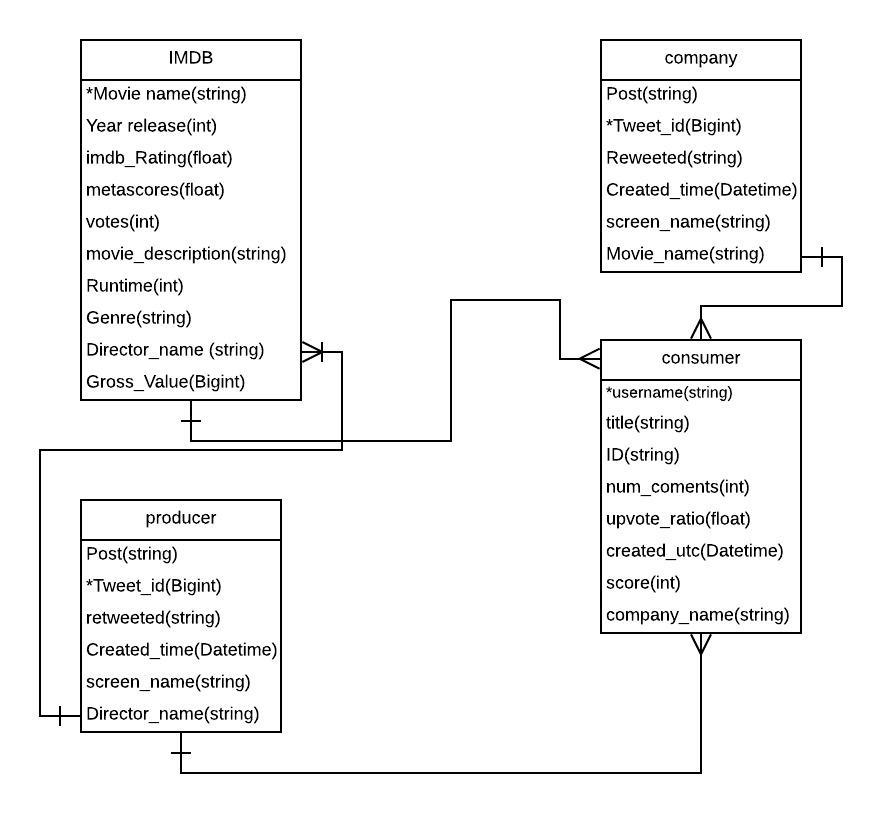

Conceptual Model :

Conceptual model has 4 entities:
1.IMDB
2.COMPANY
3.PRODUCER
4.CONSUMER
IMDB's attributes are movie_names, year_release, imdb_ratings, metascores, votes, movie_description, certificate, runtime, genre,director_name ,star_cast,gross_value.
COMPANY's attributes are post, tweet_id, retweeted, created time, screen name, movie name.
CONSUMER'S attributes are username, title, ID, num comments, upvote ratio, created utc, score, company name.
PRODUCER's attributes are post, tweet_id, retweeted, created time, screen name, movie name.

The IMDB entity is related to the consumer entity by a one to many relationship. One movie can be commented on, by many users. The IMDB entity is connected with the producer entity by a many to one relationship. One director can direct a lot of movies.
The company entity is connected with the consumer entity using a one to many relationship. One Movie can be watched by and commented on, by a number of users.
The producer entity is connected with the consumer entity by using a one to many relationship, as a number of users can be followers to a particular director.

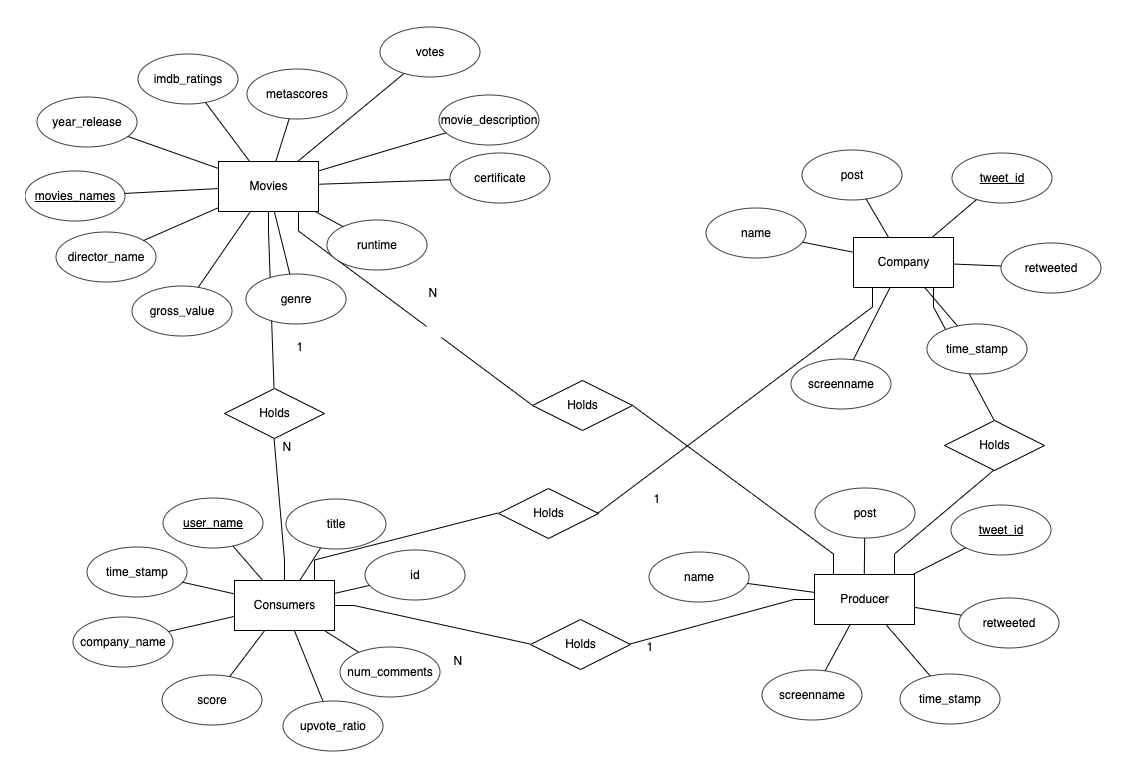